In [1]:
#==========================================
# Department of Economics - UFPE
# Prof. Marcelo Eduardo Alves da Silva
# R code to simulate NK Open Model
# June 2018
#=========================================
# R to python by Paulo
# + Impulse Response
# Nov 2021

In [2]:
#importações e configuração gráfica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def jupter_settings(): 
  %matplotlib inline 
  %pylab inline
  plt.style.use('ggplot') 
  plt.rcParams['figure.figsize'] = [20,8] 
  plt.rcParams['font.size'] = 24
  #plt.rcParams['font.family']='serif'
  plt.rcParams['font.serif']='Ubuntu'
  plt.rcParams['font.monospace']='Ubuntu Mono'
  plt.rcParams['font.size']=12
  plt.rcParams['axes.labelsize']=14
  plt.rcParams['axes.labelweight']='bold'
  plt.rcParams['axes.titlesize']=15
  plt.rcParams['xtick.labelsize']=10
  plt.rcParams['ytick.labelsize']=10
  plt.rcParams['legend.fontsize']=12
  plt.rcParams['figure.titlesize']=15
  plt.figure(figsize=(10,10))
  
  #display(html('<style>.container{width:80% !important};</style>'))
  pd.options.display.max_columns=None
  pd.options.display.max_rows=None
  pd.set_option('display.expand_frame_repr', False)

  #sns.set_style('ticks')
jupter_settings()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x720 with 0 Axes>

In [5]:
#Tamanho da simulação
n = 20
time = np.arange(1,n+1,1)

In [6]:
########################################################
#Simulação I
########################################################

In [7]:
# 1. Calibration
alpha = 0.3
rho = 0.8 
A = 4
a = 0.08
b=0.05
Lambda=0.9
q_bar=1
r_y = 0.8
r_pi = 0.5
r_bar=0.02
y_bar= A - a*r_bar + b*q_bar
pi_bar=0.04

In [8]:
#Valores iniciais das variáveis. Assumindo que estão no Steady-State
y = y_bar*np.ones((n,1))
q = q_bar*np.ones((n,1))
pi = pi_bar*np.ones((n,1))

In [9]:
#Variáveis exógenas
r = r_bar*np.ones((n,1))
r_star = r_bar*np.ones((n,1))

In [10]:
#processos dos choques 
e_d = np.zeros((n,1))
e_m = np.zeros((n,1))
e_s = np.zeros((n,1))

In [11]:
#simulação
for i in range(2,n):
  y[i] = A - a*r[i-1] + b*q[i] + e_d[i]
  pi[i] = pi[i-1] + alpha*(y[i] - y_bar) + e_s[i]
  r[i] = r_star[i] + r_y*(y[i] - y_bar) + r_pi*(pi[i] - pi_bar)+ e_m[i]
  q[i] = q_bar - (1/(1-Lambda))*(r[i] - r_star[i])

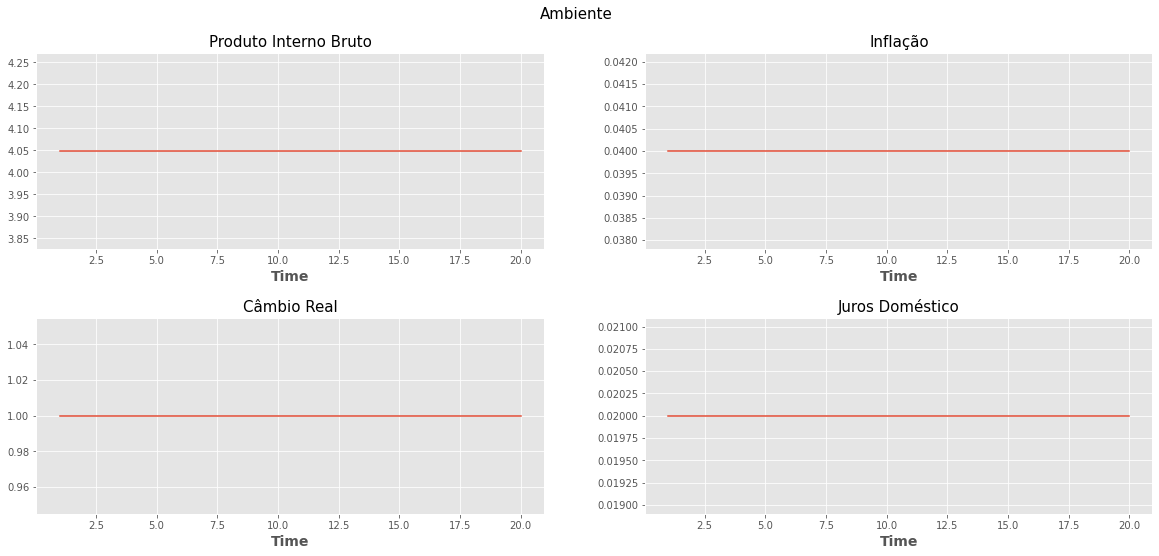

In [19]:
#Enabling subplot
plt.suptitle('Ambiente')

plt.subplot(2,2,1).set(xlabel="Time")
plt.plot(time, y)
plt.xlabel="Tempo"
plt.ylabel=""
plt.title("Produto Interno Bruto")

plt.subplot(2,2,2).set(xlabel="Time")
plt.plot(time, pi)
plt.xlabel="Tempo"
plt.ylabel=""
plt.title("Inflação")

plt.subplot(2,2,3).set(xlabel="Time")
plt.plot(time, q)
plt.xlabel="Tempo"
plt.ylabel=""
plt.title("Câmbio Real")

plt.subplot(2,2,4).set(xlabel="Time")
plt.plot(time, r)
plt.xlabel="Tempo"
plt.ylabel=""
plt.title("Juros Doméstico")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

In [14]:
########################################################
##Simulação II: Aumento em R - Determinístico
########################################################

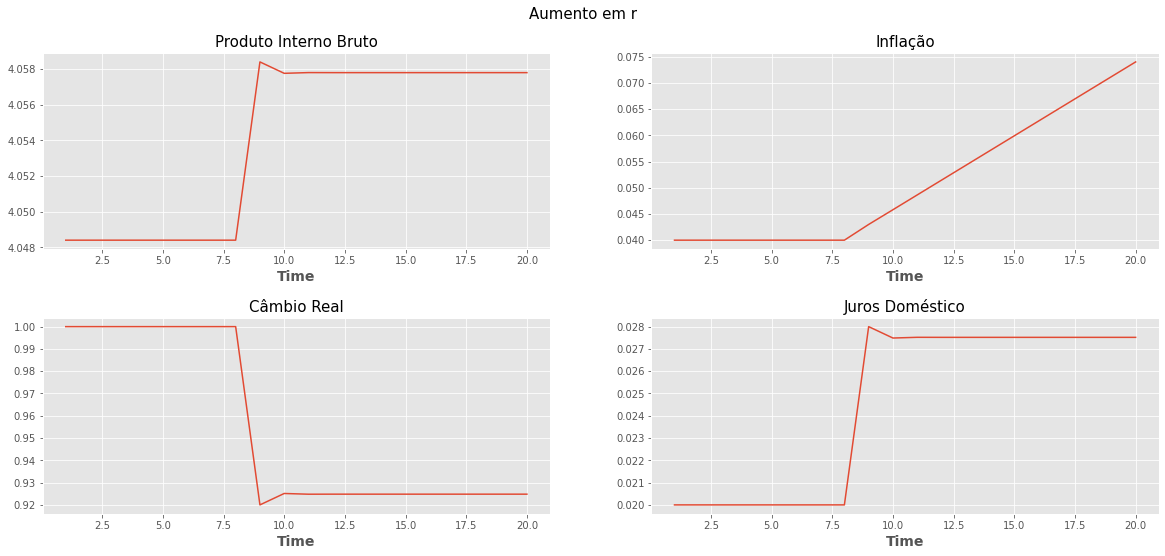

In [18]:
#simulação
y1 = y_bar*np.ones((n,1))
q1 = q_bar*np.ones((n,1))
pi1 = pi_bar*np.ones((n,1))
r1 = r_bar*np.ones((n,1))

for i in range(8,n):
  e_d[i]= 0.01

for i in range(5,n):
  y1[i] = A - a*r1[i-1] + b*q1[i] + e_d[i]
  pi1[i] = pi1[i-1] + alpha*(y1[i] - y_bar) + e_s[i]
  r1[i] =  r_star[i] + r_y*(y1[i] - y_bar) + e_m[i]
  q1[i] = q_bar - (1/(1-Lambda))*(r1[i] - r_star[i])

#Iremos "plotar" os gráficos da simulação:

#Enabling subplot
plt.suptitle('Aumento em r')

plt.subplot(2,2,1).set(xlabel="Time")
plt.plot(time, y1)
plt.title("Produto Interno Bruto")
plt.xlabel="Tempo"
plt.ylabel=""

plt.subplot(2,2,2).set(xlabel="Time")
plt.plot(time, pi1)
plt.title("Inflação")
plt.xlabel="Tempo"
plt.ylabel=""

plt.subplot(2,2,3).set(xlabel="Time")
plt.plot(time, q1)
plt.title("Câmbio Real")
plt.xlabel="Tempo"
plt.ylabel=""

plt.subplot(2,2,4).set(xlabel="Time")
plt.plot(time, r1)
plt.title("Juros Doméstico")
plt.xlabel="Tempo"
plt.ylabel=""

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

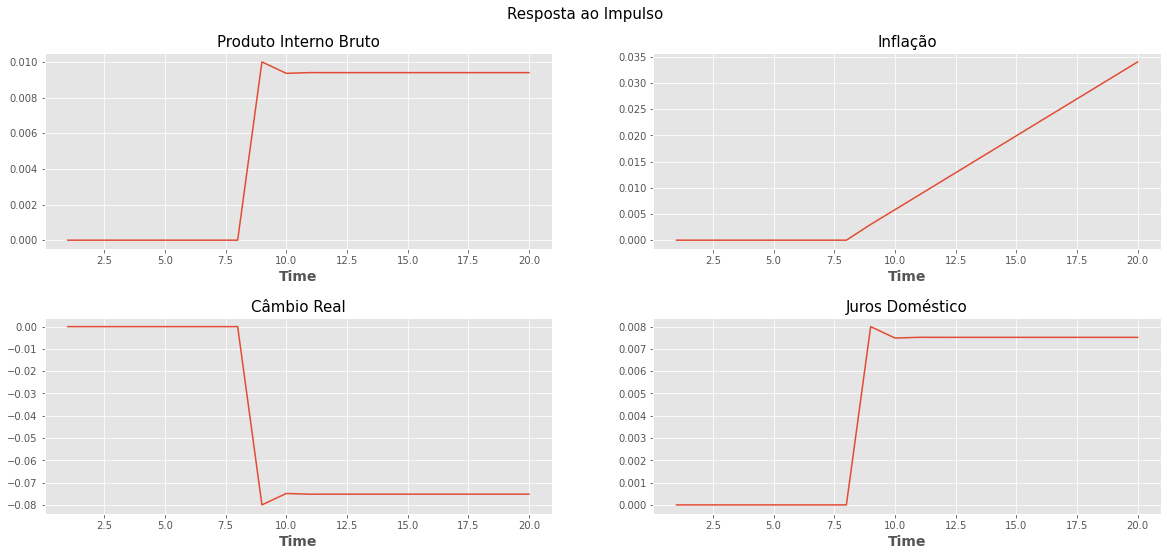

In [17]:
#Iremos "plotar" os gráficos de Resposta ao Impulso:
#Enabling subplot
plt.suptitle('Resposta ao Impulso')

plt.subplot(2,2,1).set(xlabel="Time")
plt.plot(time, (y1-y))
plt.title("Produto Interno Bruto")
plt.xlabel="Tempo"
plt.ylabel=""

plt.subplot(2,2,2).set(xlabel="Time")
plt.plot(time, (pi1-pi))
plt.title("Inflação")
plt.xlabel="Tempo"
plt.ylabel=""

plt.subplot(2,2,3).set(xlabel="Time")
plt.plot(time, (q1-q))
plt.title("Câmbio Real")
plt.xlabel="Tempo"
plt.ylabel=""

plt.subplot(2,2,4).set(xlabel="Time")
plt.plot(time, (r1-r))
plt.title("Juros Doméstico")
plt.xlabel="Tempo"
plt.ylabel=""

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()